# Part II - Ford GoBike System Data Exploration
## by Fenny Tsai

## Investigation Overview

> - What are the riders gender, age, and usertype distribution? 
- What are the rush hour of the rides in a day and a week. 
- What are the features affecting the trip duration?


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:

gobike=pd.read_csv('201902-fordgobike-tripdata.csv')
gobike_copy = gobike.copy()
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'])
gobike_copy['start_station_id'] = gobike_copy['start_station_id'].fillna(0).astype(int)
gobike_copy['end_station_id'] = gobike_copy['end_station_id'].fillna(0).astype(int)

## Distribution of Rider Gender
Male rides the bike more than gender Female and Other.

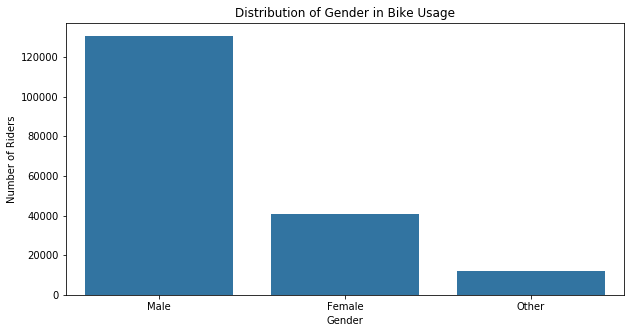

In [4]:
plt.figure(figsize=[10,5])
gobike_copy['member_gender']= gobike_copy['member_gender'].fillna('Other')
base_color = sb.color_palette()[0]
freq_gender = gobike_copy['member_gender'].value_counts()
sb.countplot(data=gobike_copy, x='member_gender', color=base_color, order=freq_gender.index)

plt.title('Distribution of Gender in Bike Usage')
plt.xlabel('Gender')
plt.ylabel('Number of Riders');

## Distribution of rider age 
The bike user's age range from 20 to 39 uses the bike most.

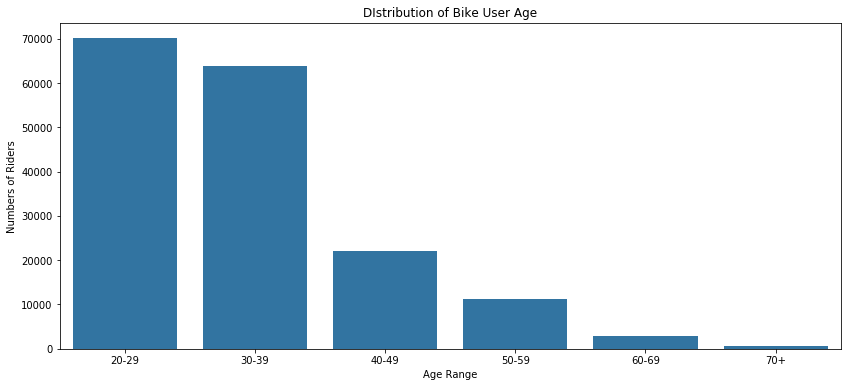

In [5]:
plt.figure(figsize=[14,6])
gobike_copy['age'] = 2019 - gobike_copy['member_birth_year']

bins = [21, 30, 40, 50, 60, 70, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
gobike_copy['age_range'] = pd.cut(gobike_copy.age, bins, labels = labels, include_lowest = True)
sb.countplot(data=gobike_copy, x='age_range', color=base_color)

plt.title('DIstribution of Bike User Age')
plt.xlabel("Age Range")
plt.ylabel("Numbers of Riders");


## Distribution of rider user type
Subscriber has much more usage on the bike.

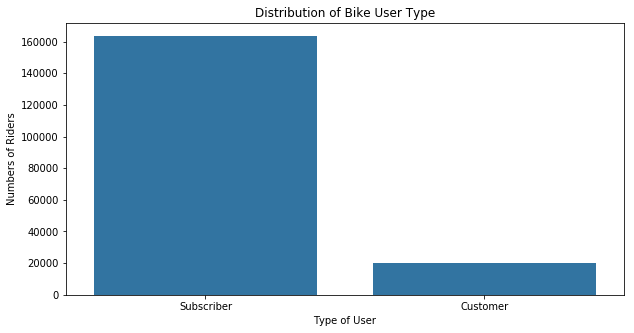

In [6]:
plt.figure(figsize=[10,5])
freq_usertype = gobike_copy['user_type'].value_counts()
sb.countplot(data=gobike_copy, x='user_type', color=base_color, order=freq_usertype.index)

plt.title('Distribution of Bike User Type')
plt.xlabel('Type of User')
plt.ylabel('Numbers of Riders');

## Distribution of Ride Usage in a Day
Most of the riders uses the bike in the evening, then morning.

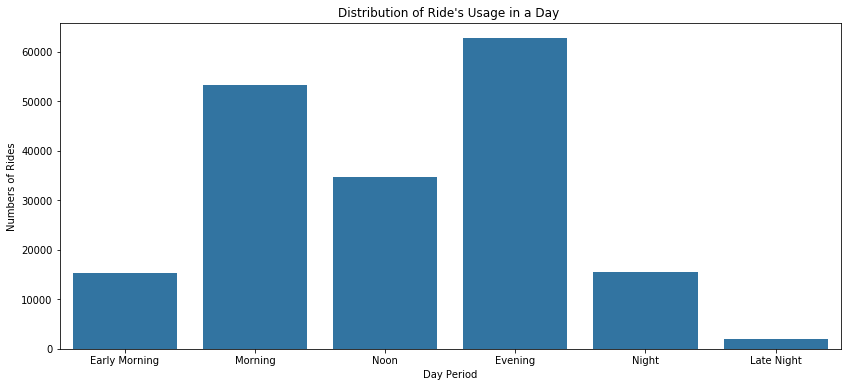

In [7]:
plt.figure(figsize=[14,6])
gobike_copy['period'] = (gobike_copy['start_time'].dt.hour % 24 + 4) // 4
gobike_copy['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

period_of_day = ['Early Morning','Morning', 'Noon', 'Evening','Night', 'Late Night']
periodofday = pd.api.types.CategoricalDtype(ordered=True, categories=period_of_day)
gobike_copy['period'] = gobike_copy['period'].astype(periodofday)

sb.countplot(data=gobike_copy, x='period', color=base_color)

plt.title('Distribution of Ride\'s Usage in a Day ')
plt.xlabel('Day Period')
plt.ylabel('Numbers of Rides');

## Distribution of Ride Usage of a Week
The bikes are be mostly used in week days than weekend.

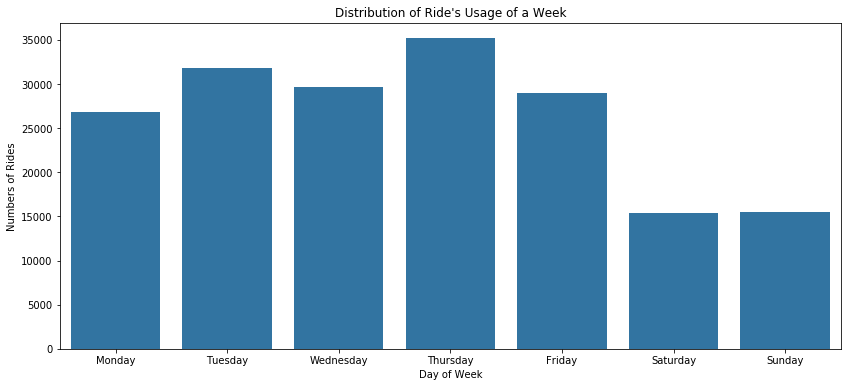

In [8]:
plt.figure(figsize=[14,6])
gobike_copy['date'] = gobike_copy['start_time'].dt.normalize()
gobike_copy['day_of_week'] = gobike_copy['date'].dt.weekday_name

day_of_week = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
dayofweek = pd.api.types.CategoricalDtype(ordered=True, categories=day_of_week)
gobike_copy['day_of_week'] = gobike_copy['day_of_week'].astype(dayofweek);

sb.countplot(data=gobike_copy, x='day_of_week', color=base_color)

plt.title('Distribution of Ride\'s Usage of a Week')
plt.xlabel('Day of Week')
plt.ylabel('Numbers of Rides');

## The relationship between using duration and day of week by user type

From the scatter plot, Subscribers have a tendency to rent out the bikes for longer trips, weekly spanning over 300 minutes. Also, Customers uses the bike more during weekends.

In [9]:
def myscatterplot(df, xVar, yVar, hueVar, order=None, palette='CMRmap' ):
    plt.figure(figsize = [14,6])
    sb.stripplot(data=df, x=xVar, y=yVar, hue=hueVar,
             jitter=0.35, dodge=True, size=4, palette=palette)
    xVar=xVar.replace("_", " ")
    yVar=yVar.replace("_", " ")
    hueVar=hueVar.replace("_", " ")
    plt.title(f'Relationship between {yVar} and {xVar}, By {hueVar}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(),fontsize=10, weight='bold')
    plt.ylabel(yVar.title(),fontsize=10, weight='bold')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title=hueVar.title());


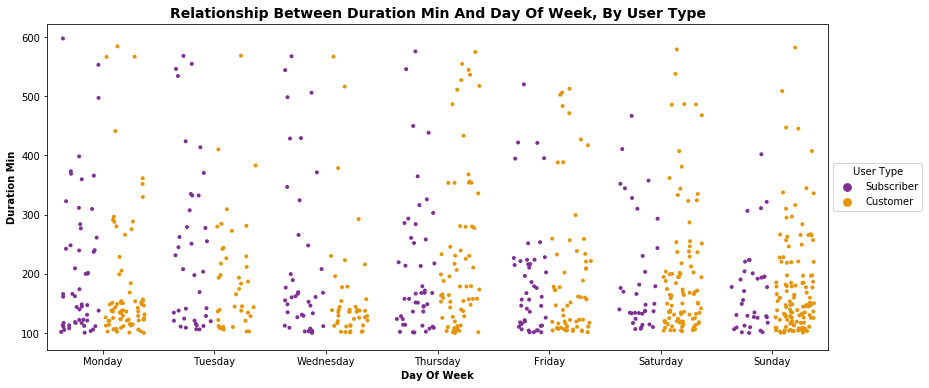

In [10]:
gobike_copy['duration_min'] = gobike_copy['duration_sec'] / 60
gobike_copy.drop('duration_sec', axis=1, inplace=True)
duration_min_above100 = gobike_copy.query('duration_min > 100 and duration_min < 600')

myscatterplot(duration_min_above100, 'day_of_week', 'duration_min', 'user_type', order=day_of_week )

## The relationship between using duration and age range by user type

In age range 30-39 and below, customers has more users than subscribers, and customers also use the bike in a longer period in this age range. On the other hand, age range above 40, there are more subscribers than customers and subscribers use the bike in a longer period.

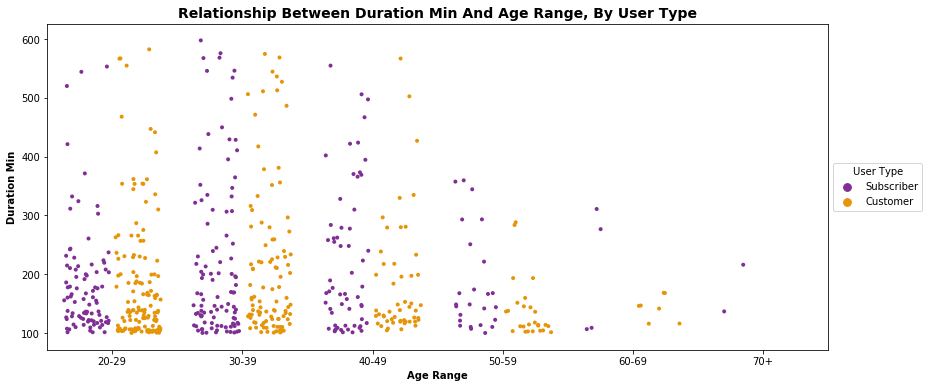

In [11]:
myscatterplot(duration_min_above100, 'age_range', 'duration_min', 'user_type', order=day_of_week )

## The relationship between using duration and day period timing in a day by user type

Most of the rides are completed during morning and noon. It is interesting that riders use a short period of time during noon.

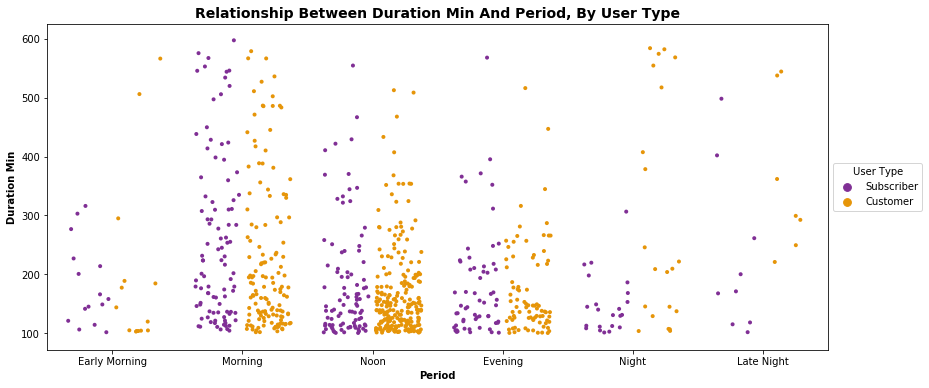

In [12]:
myscatterplot(duration_min_above100, 'period', 'duration_min', 'user_type', order=day_of_week )

## The relationship between using duration and day of week by age range
Riders age below 49 has a longer duration in using the bike. Riders in age range in 40-49 uses bike more in week days. Elderlies with age above 60 tends to use bike in weekends.

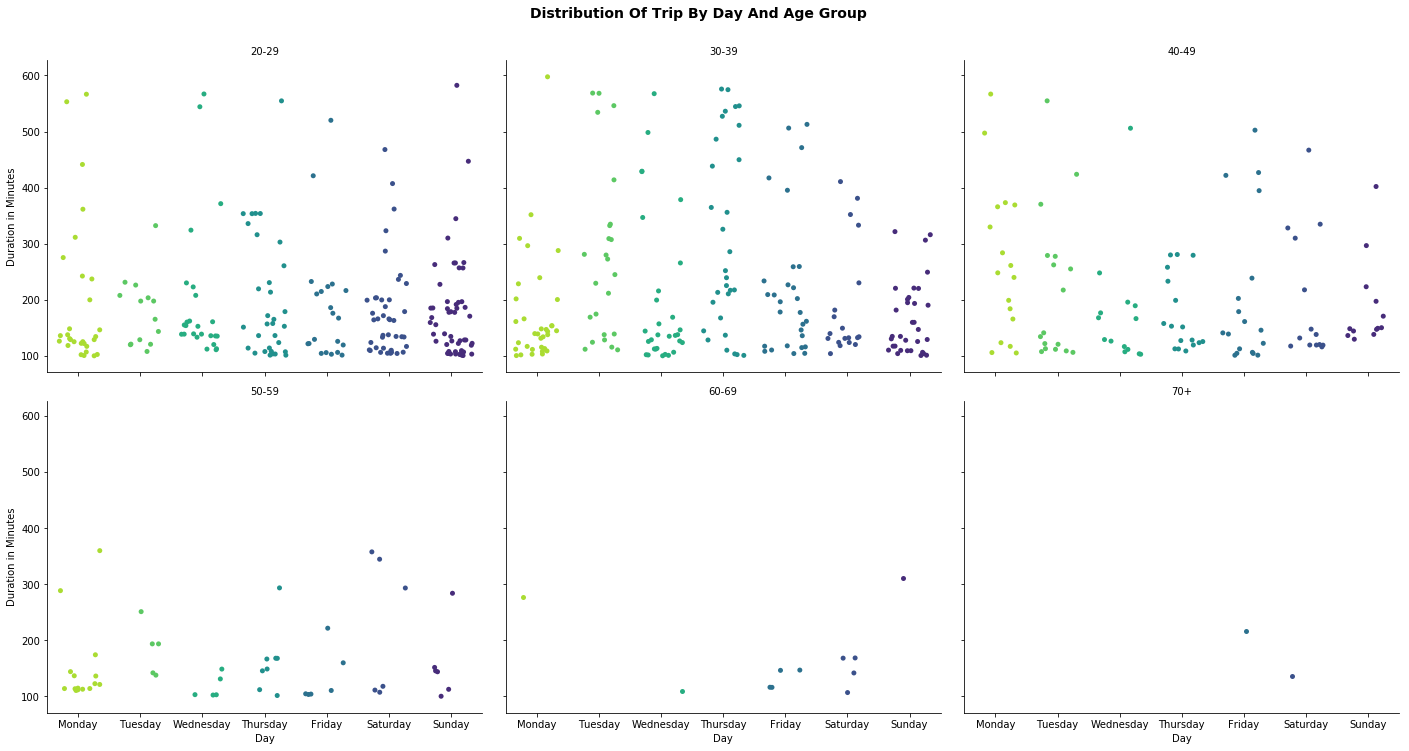

In [13]:
g = sb.FacetGrid(data=duration_min_above100, col='age_range', size=5, col_wrap=3, margin_titles = True )
g.map(sb.stripplot, 'day_of_week', 'duration_min', jitter=0.35, dodge=True, size=5, palette="viridis_r");

g.set_titles("{col_name}") 
g.set_axis_labels(x_var="Day", y_var="Duration in Minutes")
for axes in g.axes.flat:
        axes.set_xticklabels(axes.get_xticklabels(), fontsize=10)
plt.suptitle('Distribution of Trip by Day and Age Group'.title(), y=1.04, fontsize=14, weight='bold')
g.fig.set_size_inches(20, 10);

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck_template>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_slide_deck_template: No such file


In [15]:
!jupyter nbconvert Part_II_GoBike_System.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_GoBike_System.ipynb to slides
[NbConvertApp] Writing 741854 bytes to Part_II_GoBike_System.slides.html
